In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-whitegrid') # puts gridlines in background of plot

In [30]:
tc_voltage = np.linspace(5.95, 4.3, 34) # Units of milliVolts
sc_voltage_012 = np.array([.08,.08,.08,.08,.08,.09,.09,.07,.07,.06,.05,.05,.05,.05,.05,.02,-.02,-.06,-.13,-.24,-.47,-.62,-.69,-.78,-.8,-.82,-.85,-.86,-.87,-.89,-.92,-.90,-.91,-.93])
sc_voltage_021 = np.array([.08,.08,.08,.08,.08,.07,.07,.07,.07,.05,-.02,-.07,-.1,-.14,-.19,-.26,-.42,-.69,-.95,-1.15,-1.27,-1.34,-1.39,-1.43,-1.47,-1.5,-1.52,-1.55,-1.58,-1.62,-1.56,-1.58,-1.62,-1.65])
sc_voltage_033 = np.array([.08,.08,.08,.08,.08,.08,.08,.08,.01,-.03,-.16,-.26,-.35,-.43,-.53,-.61,-.75,-1.03,-1.32,-1.84,-2.38,-2.22,-2.36,-2.43,-2.47,-2.47,-2.53,-2.53,-2.59,-2.64,-2.67,-2.74,-2.77,-2.74])
sc_voltage_042 = np.array([.06,.06,.06,.06,.06,.06,.07,.06,.02,-.1,-.23,-.33,-.44,-.53,-.61,-.69,-.8,-1.03,-1.33,-1.60,-2.,-2.39,-2.61,-2.73,-2.8,-2.77,-2.77,-2.8,-2.86,-2.95,-2.89,-2.90,-2.94,-3.00])

# Determining Linear Coefficients for Temperature vs Voltage

In [31]:
mV = np.array([-0.4, 0, 0.4, 0.89, 1.39, 1.93, 2.52, 3.12, 3.76, 4.46, 5.16, 5.9, 6.92]) # values are from table in Appendix A
Kelvin = np.array([310, 290, 270, 250, 230, 210, 190, 170, 150, 130, 110, 90, 70]) # values are from table in Appendix A

In [32]:
# Equations used to determine slope and intercept can be found here: https://www.youtube.com/watch?v=GhrxgbQnEEU

std_x = (((np.std(mV) ** 2) * len(mV)) / (len(mV) - 1))**0.5 # std_mV is the sample standard deviation
std_y = (((np.std(Kelvin) ** 2) * len(Kelvin)) / (len(Kelvin) - 1))**0.5 # std_Kelvin is the sample standard deviation

x_mean = np.mean(mV) # x mean
y_mean = np.mean(Kelvin) # y mean

r = sum((mV - x_mean) * (Kelvin - y_mean)) / (np.sqrt(sum((mV - x_mean) ** 2) * sum((Kelvin - y_mean) ** 2)))  

m = r * (std_y / std_x)
b = y_mean - (m * x_mean)

m = -32.94297124092314
b = 281.35339332579076
This line of best fit is used to convert from millivolts to Kelvin


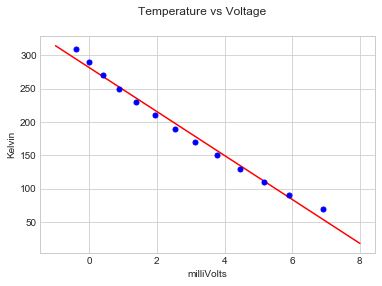

In [33]:
plt.errorbar(mV, Kelvin, yerr = m * 0.005, fmt = "bo", markersize = "5", linewidth=3)
x = np.linspace(-1, 8, 10)
y = m*x + b
plt.plot(x, y, 'r') # Plotting line of best fit
plt.xlabel('milliVolts')
plt.ylabel('Kelvin')
plt.suptitle('Temperature vs Voltage')
plt.savefig('volts_to_kelvin.png')
print('m = ' + str(m) + '\nb = ' + str(b) + '\nThis line of best fit is used to convert from millivolts to Kelvin')

# BSCCO PROBE - PART C

In [34]:
def mVToKelvin(mV, m, b):
    '''takes the voltage (in milliVolts), slope, and y-intercept, and returns the temperature, 
    in Kelvin, corresponding to the given voltage'''
    return m * mV + b

In [35]:
resistance_012 = np.array(sc_voltage_012) / 0.12 # units of milliohms
resistance_021 = np.array(sc_voltage_021) / 0.21 # units of milliohms
resistance_033 = np.array(sc_voltage_033) / 0.33 # units of milliohms
resistance_042 = np.array(sc_voltage_042) / 0.42 # units of milliohms
temperature = [mVToKelvin(item, m, b) for item in tc_voltage]
temp_err = m * (0.005) # Error in temperature with units of Kelvin

Estimated critical temperature: 117.7 +/- 0.17 Kelvin - determined from 0.12 Ampere plot below


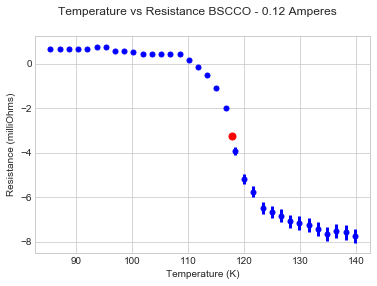

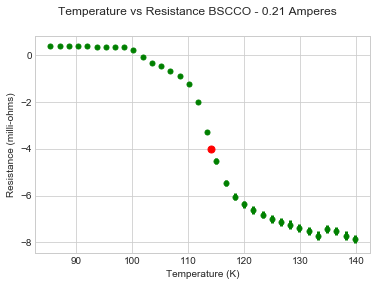

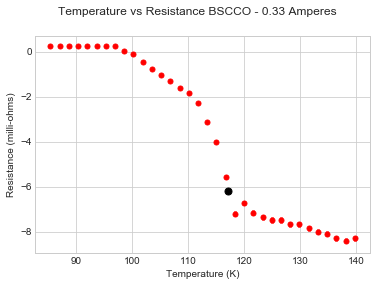

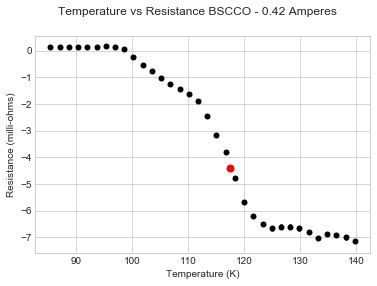

In [36]:
voltage_err = .005e-3 # units of Volts
current_err = 0.005 # units of Amperes
res_012_err = 1000 * np.sqrt(voltage_err**2 + (((sc_voltage_012 / 1000) / 0.12) * current_err)**2) / 0.12 # units of milliohm's
res_021_err = 1000 * np.sqrt(voltage_err**2 + (((sc_voltage_021 / 1000) / 0.21) * current_err)**2) / 0.21 # units of milliohm's
res_033_err = 1000 * np.sqrt(voltage_err**2 + (((sc_voltage_033 / 1000) / 0.33) * current_err)**2) / 0.33 # units of milliohm's
res_042_err = 1000 * np.sqrt(voltage_err**2 + (((sc_voltage_042 / 1000) / 0.42) * current_err)**2) / 0.42 # units of milliohm's

plt.figure(2)
plt.errorbar(temperature, resistance_012, yerr = res_012_err, fmt = "bo", markersize = "5", linewidth=3, label = '0.12 A')
plt.ylabel('Resistance (milliOhms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance BSCCO - 0.12 Amperes")
plt.plot(117.7, -3.25, 'ro', markersize = "7") # plotting midpoint of stepchange. This is not an actual data point - only a marker
plt.savefig('012.png')

plt.figure(3)
plt.errorbar(temperature, resistance_021, yerr = res_021_err, fmt = "go", markersize = "5", linewidth=3, label = '0.21 A')
plt.ylabel('Resistance (milli-ohms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance BSCCO - 0.21 Amperes")
plt.plot(114, -4, 'ro', markersize = "7") # plotting midpoint of stepchange. This is not an actual data point - only a marker
plt.savefig('021.png')

plt.figure(4)
plt.errorbar(temperature, resistance_033, yerr = res_033_err, fmt = "ro", markersize = "5", linewidth=3, label = '0.33 A')
plt.ylabel('Resistance (milli-ohms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance BSCCO - 0.33 Amperes")
plt.plot(117, -6.2, 'ko', markersize = "7") # plotting midpoint of stepchange. This is not an actual data point - only a marker
plt.savefig('033.png')

plt.figure(5)
plt.errorbar(temperature, resistance_042, yerr = res_042_err, fmt = "ko", markersize = "5", linewidth=3, label = '0.42 A')
plt.ylabel('Resistance (milli-ohms)')
plt.xlabel('Temperature (K)')
plt.suptitle("Temperature vs Resistance BSCCO - 0.42 Amperes")
plt.savefig('042.png')

plt.plot(117.5, -4.4, 'ro', markersize = "7") # plotting midpoint of stepchange. This is not an actual data point - only a marker
print('Estimated critical temperature: 117.7 +/- 0.17 Kelvin - determined from 0.12 Ampere plot below')